# Libraries

In [1]:
from functions import *
import shapely as sh
import scipy as sc

# Select dataset

In [2]:
div = 2
df = sort_contours_using_uniform_pdf_and_group("dataset_contours_aggregate_by_patch.csv", "dataset_contours_aggregate_by_patch.json", 4, div)
df

,image_name,"x coordinate in 0,0","y coordinate in 0,0",diameter (px),diameter (mm),area (px),area (mm2),group by diameter (px)
0,01_136.png,"[-23.531035738122682, -23.531035738122682, -23...","[-77.10711324151043, -76.10711324151043, -75.1...",140.637177,4.219115,8240.5,7.41645,1
1,01_344.png,"[-40.41439788891029, -40.41439788891029, -40.4...","[-40.55889167793009, -39.55889167793009, -38.5...",107.764557,3.232937,5179.0,4.66110,1
2,01_224.png,"[-4.707922599488938, -5.707922599488938, -6.70...","[-55.94226907630514, -54.94226907630514, -53.9...",104.666443,3.139993,3652.0,3.28680,2
3,01_213.png,"[18.52870800619553, 17.52870800619553, 16.5287...","[-34.768199540671844, -33.768199540671844, -33...",84.811752,2.544353,3120.5,2.80845,2


In [3]:
# color = [
#             '#3a7b9f', '#d4e2c3', '#f0119b', '#a1c935', "#28f8a1",
#             '#ff9000', '#b04c87', '#52e0ff', '#6012ff', '#c0ffee',
#             '#123456', '#654321', '#ff00ff', '#00ff00', '#0000ff',
#             '#abcdef', '#fedcba', '#a0b1c2', '#1f2e3d', '#f0f8ff', '#3a7b9f',    
#         ]

In [4]:
# img_w, img_h = 2500, 2500
# fig, ax = plt.subplots(figsize=(7, 7))
# ax.imshow(np.ones((img_h, img_w)), cmap="gray")
# for k in [1, 2, 3, 4, 5]:# , div+1):
#     df_group = df[df['group by diameter (px)'] == k].reset_index(drop=True)
#     target_size = df_group['diameter (px)'].max() + 50
#     nx = int(round(img_w / target_size))
#     ny = int(round(img_h / target_size))
#     cell_w = img_w / nx
#     cell_h = img_h / ny
#     centers = []
#     ids = []
#     if k > 1:
#         quad_contours = []
#     for j in range(ny):
#         for i in range(nx):
#             cx = (i + 0.5) * cell_w
#             cy = (j + 0.5) * cell_h
#             centers.append((cx, cy))
#             ids.append(j * nx + i)
#             if k > 1:
#                 # quad_contours.append([(cx - cell_w / 2, cy - cell_h / 2), (cx + cell_w / 2, cy - cell_h / 2), (cx + cell_w / 2, cy + cell_h / 2), (cx - cell_w / 2, cy + cell_h / 2)])
#                 n = 5
#                 quad_contours.append([(cx - (cell_w-n) / 2, cy - (cell_h-n) / 2), (cx + (cell_w-n) / 2, cy - (cell_h-n) / 2), (cx + (cell_w-n) / 2, cy + (cell_h-n) / 2), (cx - (cell_w-n) / 2, cy + (cell_h-n) / 2)])
#     center_ids_selected = np.random.choice(ids, size=len(df_group), replace=False)
#     centers = np.array(centers)

#     # Check colision
#     if k > 1:
#         colision_bin = [0] * len(quad_contours)
#         for i, quad in enumerate(quad_contours):
#             quad_poly = sh.geometry.Polygon(quad)
#             for cont in contours:
#                 if quad_poly.intersects(sh.geometry.Polygon(cont)):
#                     colision_bin[i] = 1
#                     break
#         ids_temp = [i for i in range(len(quad_contours)) if colision_bin[i] == 0]
#         if len(ids_temp) < len(df_group):
#             center_ids_selected = np.random.choice(ids_temp, size=len(ids_temp), replace=False)
#         else:
#             center_ids_selected = np.random.choice(ids_temp, size=len(df_group), replace=False)

#     if k == 4:
#         for i in range(nx + 1):
#             x = i * cell_w
#             ax.axvline(x, color='blue', linewidth=1)
#         for j in range(ny + 1):
#             y = j * cell_h
#             ax.axhline(y, color='blue', linewidth=1)
#     if k <= 1:
#         contours = []
#     for m, row in df_group.iterrows():
#         print(m)
#         x_df = row['x coordinate in 0,0']
#         y_df = row['y coordinate in 0,0']
#         cx, cy = centers[center_ids_selected[m], 0], centers[center_ids_selected[m], 1]
#         cx_noise = noise_point([cx], value_noise=1)
#         cy_noise = noise_point([cy], value_noise=1)
#         ax.scatter(cx_noise, cy_noise, c='red', s=2)
#         x_new, y_new = trans_rota_polygon(x_df, y_df, cx_noise[0], cy_noise[0], angle=np.random.uniform(0, 360))
#         contours.append(list(zip(x_new, y_new)))
#         ax.plot(x_new, y_new, color[k])
#         ax.fill(x_new, y_new, color[k], alpha=0.3)
# plt.show()

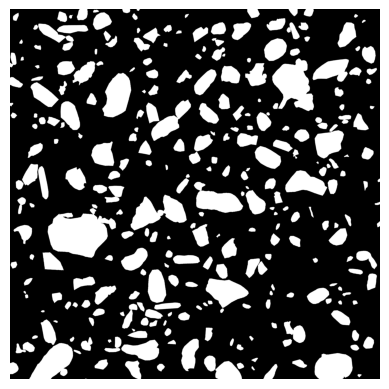

Gross section generated: gross_section.png
Contours saved to: gross_section.json
Final size: 2500x2500 px


In [5]:
gross_section_from_dataset(
    csv_path="dataset_contours_aggregate_by_patch.csv",
    json_path="dataset_contours_aggregate_by_patch.json",
    n_objects=300,               # number of aggregates to place
    div=20,                      # division parameter for sorting/grouping
    output_image_path="gross_section.png",   # final black & white cropped image
    output_json_path="gross_section.json"    # final adjusted contours in JSON
)

In [ ]:
import json
import numpy as np
import cv2

def plot_gross_section_from_json(json_path: str):
    """
    Lê o JSON com contornos (lista de pontos) e plota a imagem usando OpenCV.
    A imagem é preta (fundo 0) e os contornos são preenchidos em branco (255).
    """

    # 1. Ler JSON
    with open(json_path, "r") as f:
        data = json.load(f)
    
    contours = data.get("contours", [])
    if not contours:
        raise ValueError("JSON não contém contornos no formato esperado.")

    # 2. Encontrar o tamanho da imagem necessária (bounding box dos pontos)
    all_points = np.vstack([np.array(c, dtype=np.float32) for c in contours])
    x_min, y_min = np.floor(all_points.min(axis=0)).astype(int)
    x_max, y_max = np.ceil(all_points.max(axis=0)).astype(int)

    width = x_max - x_min + 1
    height = y_max - y_min + 1

    # 3. Criar imagem preta no tamanho do bounding box
    img = np.zeros((height, width), dtype=np.uint8)

    # 4. Ajustar os contornos para o sistema de coordenadas da imagem (mínimos em zero)
    adjusted_contours = []
    for contour in contours:
        pts = np.array(contour, dtype=np.int32)
        pts[:, 0] -= x_min
        pts[:, 1] -= y_min
        adjusted_contours.append(pts)

    # 5. Preencher os contornos na imagem
    cv2.fillPoly(img, adjusted_contours, 255)

    # 6. Mostar a imagem sem janela 
    cv2.imshow("Gross Section from JSON", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


# Uso:
# plot_gross_section_from_json("gross_section.json")


In [7]:
# div = 20
# df = sort_contours_using_uniform_pdf_and_group("dataset_contours_aggregate_by_patch.csv", "dataset_contours_aggregate_by_patch.json", 300, div)
# img_w, img_h = 2500, 2500
# fig, ax = plt.subplots(figsize=(7, 7))
# ax.imshow(np.ones((img_h, img_w)), cmap="gray")
# contours = []
# collision_control = []
# for m, row in df.iterrows():
#     if m < 1:
#         n = 1
#         sampler = sc.stats.qmc.LatinHypercube(d=2)
#         sample = sampler.random(n=n)
#         centroids = sc.stats.qmc.scale(sample, [0, 0], [img_w, img_h])
#         x_df = row['x coordinate in 0,0']
#         y_df = row['y coordinate in 0,0']
#         cx, cy = centroids[0, 0], centroids[0, 1]
#         cx_noise = noise_point([cx], value_noise=1)
#         cy_noise = noise_point([cy], value_noise=1)
#         x_new, y_new = trans_rota_polygon(x_df, y_df, cx_noise[0], cy_noise[0], angle=np.random.uniform(0, 360))
#         current_contour = list(zip(x_new, y_new))
#         contours.append(current_contour)
#         ax.scatter(cx_noise, cy_noise, c='red', s=2)
#         ax.plot(x_new, y_new)
#         ax.fill(x_new, y_new, alpha=0.3)
#     else:
#         th = True
#         max_iter = 0
#         while th and max_iter < 10:
#             # print("max_iter:", max_iter)
#             n = 1
#             sampler = sc.stats.qmc.LatinHypercube(d=2)
#             sample = sampler.random(n=n)
#             centroids = sc.stats.qmc.scale(sample, [0, 0], [img_w, img_h])
#             x_df = row['x coordinate in 0,0']
#             y_df = row['y coordinate in 0,0']
#             cx, cy = centroids[0, 0], centroids[0, 1]
#             cx_noise = noise_point([cx], value_noise=5)
#             cy_noise = noise_point([cy], value_noise=5)
#             x_new, y_new = trans_rota_polygon(x_df, y_df, cx_noise[0], cy_noise[0], angle=np.random.uniform(0, 360))
#             current_contour = list(zip(x_new, y_new))
#             for _, quad in enumerate([current_contour]):
#                 quad_poly = sh.geometry.Polygon(quad)
#                 for cont in contours:
#                     th = quad_poly.intersects(sh.geometry.Polygon(cont))
#                     # print("th:", th)
#                     if th:
#                         # print("Collision detected, retrying...")
#                         break
#             if th==False:
#                 # print("passei aqui no False th...")
#                 contours.append(current_contour)
#                 ax.scatter(cx_noise, cy_noise, c='red', s=2)
#                 ax.plot(x_new, y_new)
#                 ax.fill(x_new, y_new, alpha=0.3)
#                 break
#             else:
#                 # print("Another try...")
#                 pass
#             max_iter += 1
# # ax.axis('off')  # Remove os eixos (opcional)
# plt.savefig(
#     'output_image.png',  # Nome do arquivo (salvo na raiz do projeto)
#     dpi=600,            # Resolução (ajuste para controlar qualidade/tamanho)
#     bbox_inches='tight', # Remove bordas brancas
#     pad_inches=0,       # Remove espaçamento extra
#     transparent=True    # Fundo transparente (opcional)
# )

# # Exibe a imagem (opcional, pode remover se quiser apenas salvar)
# plt.show()

# Gross section generator

In [8]:
# generate_canvas_from_json("dataset_contours_aggregate_by_patch.json", (2500, 2500), 300)